<a href="https://colab.research.google.com/github/Waleed123/Kaggle_Competition_new/blob/main/Kagglecompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt_kaggle

from google.colab import drive
drive.mount('/content/drive/')

# Load data
train_kaggle_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_kaggle_df = pd.read_csv('/content/drive/MyDrive/test.csv')

Mounted at /content/drive/


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
Pa

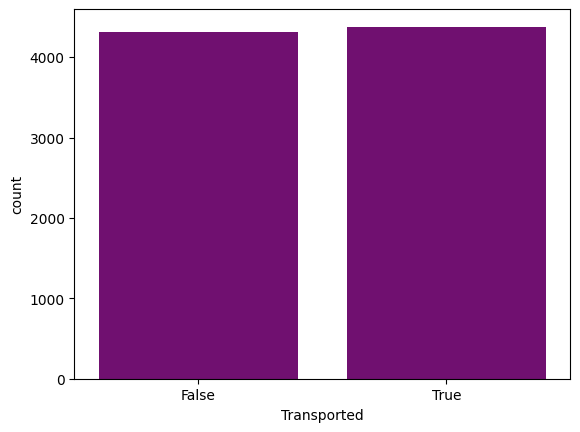

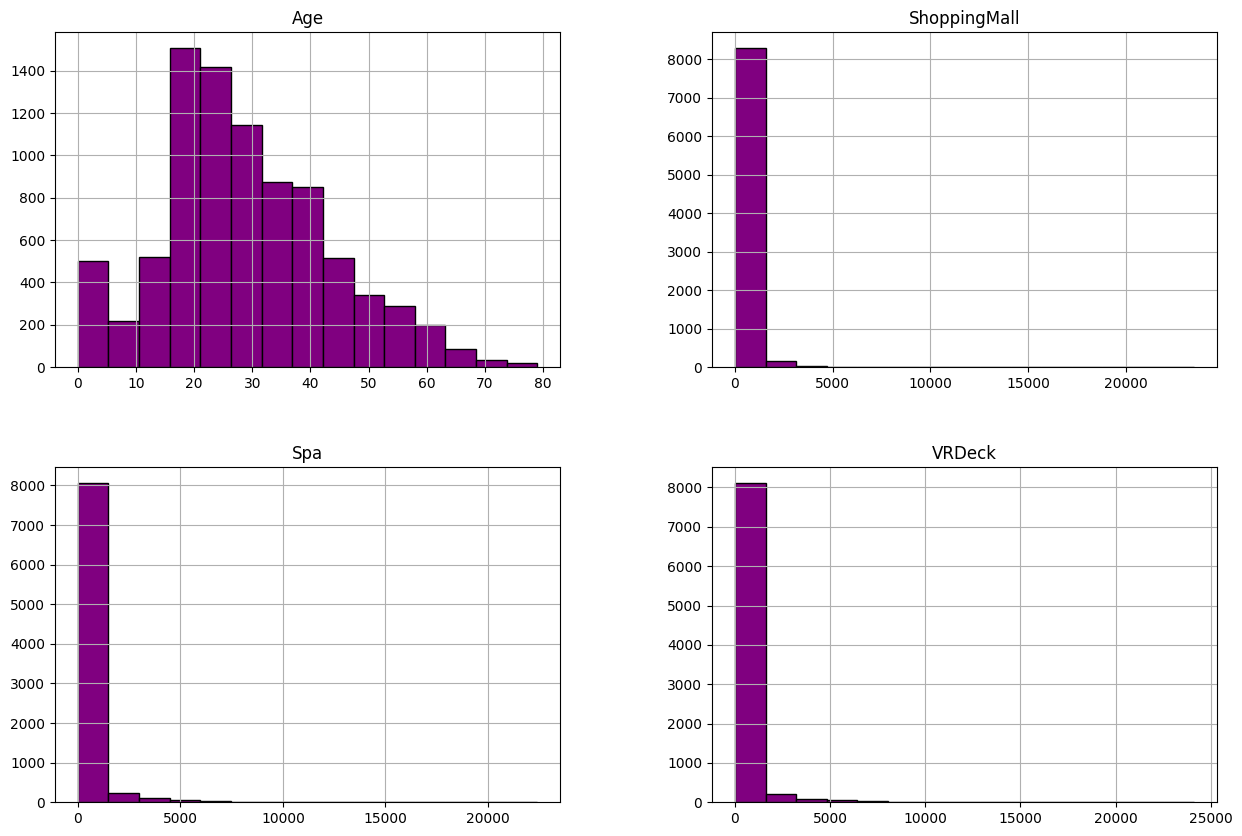

In [2]:
# Display the first few rows of the training dataset
print(train_kaggle_df.head())

# Store the 'PassengerId' column from the test dataset for future use
test_passenger_ids = test_kaggle_df['PassengerId']

# Check for missing values in the training dataset
print(train_kaggle_df.isnull().sum())

# Plot the distribution of the target variable 'Transported' using a count plot
sns.countplot(data=train_kaggle_df, x='Transported', color='purple')
plt_kaggle.show()

# Visualize the distribution of numeric features using histograms
numeric_features = ['Age', 'ShoppingMall', 'Spa', 'VRDeck']
train_kaggle_df[numeric_features].hist(bins=15, figsize=(15, 10), color='purple', edgecolor='black')
plt_kaggle.show()

In [3]:
# Drop the 'PassengerId', 'Name', 'Cabin', and 'VIP' columns from both the training and test datasets
train_kaggle_df.drop(['PassengerId', 'Name', 'Cabin', 'VIP'], axis=1, inplace=True)
test_kaggle_df.drop(['PassengerId', 'Name', 'Cabin', 'VIP'], axis=1, inplace=True)

# Define the categorical and numerical features
categorical_kaggle_features = ['HomePlanet', 'CryoSleep', 'Destination']
numeric_kaggle_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Initialize imputers for handling missing values in numerical and categorical features
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in numerical features using the median
train_kaggle_df[numeric_kaggle_features] = numeric_imputer.fit_transform(train_kaggle_df[numeric_kaggle_features])
test_kaggle_df[numeric_kaggle_features] = numeric_imputer.transform(test_kaggle_df[numeric_kaggle_features])

# Impute missing values in categorical features using the most frequent value
train_kaggle_df[categorical_kaggle_features] = categorical_imputer.fit_transform(train_kaggle_df[categorical_kaggle_features])
test_kaggle_df[categorical_kaggle_features] = categorical_imputer.transform(test_kaggle_df[categorical_kaggle_features])

# Encode categorical variables into numerical values using LabelEncoder
label_encoders = {}
for feature in categorical_kaggle_features:
    label_encoders[feature] = LabelEncoder()
    train_kaggle_df[feature] = label_encoders[feature].fit_transform(train_kaggle_df[feature])
    test_kaggle_df[feature] = label_encoders[feature].transform(test_kaggle_df[feature])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
train_kaggle_df[numeric_kaggle_features] = scaler.fit_transform(train_kaggle_df[numeric_kaggle_features])
test_kaggle_df[numeric_kaggle_features] = scaler.transform(test_kaggle_df[numeric_kaggle_features])
